In [1]:
import cv2
import numpy as np
import sys
import torch
from src.fusionModel.nn.segment import SegmentFocus
torch.set_float32_matmul_precision('medium')

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [2]:
import cv2
import torch
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


# Open the image using PIL
image1 = Image.open('/home/anirudhan/project/image-fusion/data/RealMFF/imageA/687_A.png')
image2 = Image.open('/home/anirudhan/project/image-fusion/data/RealMFF/imageB/687_B.png')
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformations to the image
image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SegmentFocus([16, 192, 384, 768], 8)
model = model.to(device)
dummy_output = model(image1.to(device), image2.to(device))
model = torch.compile(model)
model.load_state_dict(torch.load('/home/anirudhan/project/image-fusion/results/checkpoints/model_24.pth')['model_state_dict'])

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [4]:
model = model.eval()
output = model(image1.to(device), image2.to(device))
output = torch.nn.functional.softmax(output, dim=1)

In [5]:
output = output.squeeze().detach().cpu().permute(1, 2, 0).numpy()

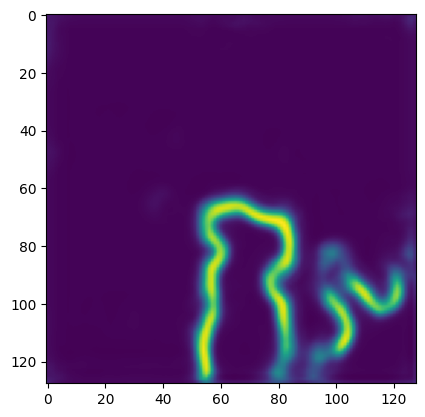

In [7]:
plt.imshow(output[:,:,1])